In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("class.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

In [8]:
from sklearn.preprocessing import normalize
cdf = df[["age","trtbps","chol","thalachh"]]
norm = normalize(cdf.values)
norm
norm_df = pd.DataFrame(norm,columns = ["age","trtbps","chol","thalachh"])
norm_df

y = df["output"]
df = df.drop("output",axis=1)

In [9]:
def replace(df,x,norm):
    df.drop(x,axis=1,inplace = True)
    df[x] = norm[x]
    return(df)
    
replace(df,"age",norm_df)
replace(df,"trtbps",norm_df)
replace(df,"chol",norm_df)
replace(df,"thalachh",norm_df)

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,age,trtbps,chol,thalachh
0,1,3,1,0,0,2.3,0,0,1,0.197471,0.454496,0.730329,0.470169
1,1,2,0,1,0,3.5,0,0,2,0.108759,0.382125,0.734856,0.549672
2,0,1,0,0,0,1.4,2,0,2,0.136833,0.433862,0.680829,0.574032
3,1,1,0,1,0,0.8,2,0,2,0.172889,0.370476,0.728603,0.549540
4,0,0,0,1,1,0.6,2,0,2,0.138435,0.291442,0.859755,0.395876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0.183910,0.451709,0.777585,0.396859
299,1,3,0,1,0,1.2,1,0,3,0.141425,0.345705,0.829692,0.414846
300,1,0,1,1,0,3.4,1,2,3,0.236760,0.501374,0.671980,0.490929
301,1,0,0,1,1,1.2,1,1,3,0.253559,0.578292,0.582740,0.511566


In [10]:
#cdf2 = df[["sex","exng","caa","cp","fbs","restecg","output"]]

In [11]:
df["output"] = y
df

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,age,trtbps,chol,thalachh,output
0,1,3,1,0,0,2.3,0,0,1,0.197471,0.454496,0.730329,0.470169,1
1,1,2,0,1,0,3.5,0,0,2,0.108759,0.382125,0.734856,0.549672,1
2,0,1,0,0,0,1.4,2,0,2,0.136833,0.433862,0.680829,0.574032,1
3,1,1,0,1,0,0.8,2,0,2,0.172889,0.370476,0.728603,0.549540,1
4,0,0,0,1,1,0.6,2,0,2,0.138435,0.291442,0.859755,0.395876,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0.183910,0.451709,0.777585,0.396859,0
299,1,3,0,1,0,1.2,1,0,3,0.141425,0.345705,0.829692,0.414846,0
300,1,0,1,1,0,3.4,1,2,3,0.236760,0.501374,0.671980,0.490929,0
301,1,0,0,1,1,1.2,1,1,3,0.253559,0.578292,0.582740,0.511566,0


In [12]:
train , test = train_test_split(df,test_size=0.2,random_state=42)
train_target = train["output"]
train = train.drop("output",axis=1)

test_target = test["output"]
test = test.drop("output",axis=1)


In [13]:
from sklearn.decomposition import PCA
pca =  PCA(n_components=0.9)
x_train_pca = pca.fit_transform(train)
print(pca.n_components_)

6


In [14]:
x_test_pca = pca.transform(test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=7)
knn.fit(x_train_pca,train_target)

KNeighborsClassifier(n_neighbors=7)

In [16]:
pred = knn.predict(x_test_pca)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target,pred)

0.8688524590163934

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_cls = DecisionTreeClassifier(max_depth = 50)
tree_cls.fit(train,train_target)

DecisionTreeClassifier(max_depth=50)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
param = {"criterion":["gini","entropy","logloss"],"max_depth":[20,50,13,100,],"max_features":[None,"outo","sqrt","log2"]}
clf = RandomizedSearchCV(tree_cls, param, random_state=0)
search = clf.fit(train.values, train_target.values)
search.best_params_

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "E:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 255, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

{'max_features': None, 'max_depth': 50, 'criterion': 'gini'}

In [33]:
y_hat = tree_cls.predict(test)

In [34]:
from sklearn import metrics
acy = metrics.accuracy_score(test_target,y_hat)
print("score: ",acy)

score:  0.8524590163934426


              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

[[27  2]
 [ 7 25]]


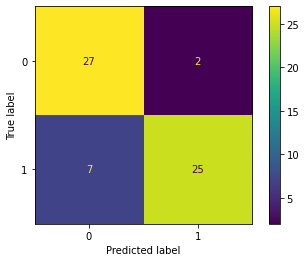

In [36]:
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import plot_confusion_matrix

cnf = confusion_matrix(test_target,y_hat,labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(test_target,y_hat))
print(cnf)

plot_confusion_matrix(tree_cls,test,test_target,)